<a href="https://colab.research.google.com/github/lmksoehd/ABC_boot_camp/blob/main/06_1970%EB%85%84%EB%8C%80_%EB%B3%B4%EC%8A%A4%ED%86%A4_%EC%A7%80%EC%97%AD%EC%9D%98_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1970년대 보스턴 지역의 주택 가격을 예측하는 회귀 문제

## 보스턴 주택 가격 데이터셋 다운로드

In [1]:
from keras.datasets.boston_housing import load_data                           # no tensorflow

# 데이터를 다운받습니다.(훈련셋 80%, 테스트셋 20%)
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

## 데이터 형태 확인

In [2]:
print('X_train.shape,' , X_train.shape)
print('y_train.shape,' , y_train.shape)

X_train.shape, (404, 13)
y_train.shape, (404,)


In [3]:
type(X_train) #13feature

numpy.ndarray

In [4]:
y_train[0]    # house price

22.5

In [5]:
print('X_test.shape,' , X_test.shape)
print('y_test.shape,' , y_test.shape)

X_test.shape, (102, 13)
y_test.shape, (102,)


## 데이터 전처리(feature) 표준화(Standardzation)

*   회귀 모델에서는 y값( 여기선 집값)을 건들지 않는다.




In [6]:
import numpy as np

# (데이터-전체평균)/표준편차
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

#(X_train-mean)/std

In [7]:
# 전처리(X_train, X_test) 둘 다 처리

X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

print(X_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


## 검증 데이터셋 생성

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state=777)

print(X_train.shape, X_val.shape)

(270, 13) (134, 13)


## 모델 구성하기

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))   # activation = linear



## 모델 설정하기

In [10]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse']) #mae 정확한 에러
# 각 에러 사용법 알아두

## 모델 학습하기

In [11]:
history = model.fit(X_train, y_train,
                    epochs = 300,
                    validation_data = (X_val, y_val))

Epoch 1/300
9/9 [==============================] - 5s 77ms/step - loss: 522.8083 - mae: 21.1980 - mse: 522.8083 - val_loss: 573.1421 - val_mae: 21.7511 - val_mse: 573.1421
Epoch 2/300
9/9 [==============================] - 0s 26ms/step - loss: 496.5090 - mae: 20.5898 - mse: 496.5090 - val_loss: 541.9935 - val_mae: 21.0762 - val_mse: 541.9935
Epoch 3/300
9/9 [==============================] - 0s 34ms/step - loss: 464.6110 - mae: 19.8400 - mse: 464.6110 - val_loss: 503.0213 - val_mae: 20.2020 - val_mse: 503.0213
Epoch 4/300
9/9 [==============================] - 1s 69ms/step - loss: 424.2578 - mae: 18.8643 - mse: 424.2578 - val_loss: 454.4506 - val_mae: 19.0680 - val_mse: 454.4506
Epoch 5/300
9/9 [==============================] - 1s 69ms/step - loss: 376.1425 - mae: 17.6332 - mse: 376.1425 - val_loss: 396.1726 - val_mae: 17.6222 - val_mse: 396.1726
Epoch 6/300
9/9 [==============================] - 0s 20ms/step - loss: 319.4977 - mae: 16.1043 - mse: 319.4977 - val_loss: 327.9403 - val_m

## 모델 결과 분석

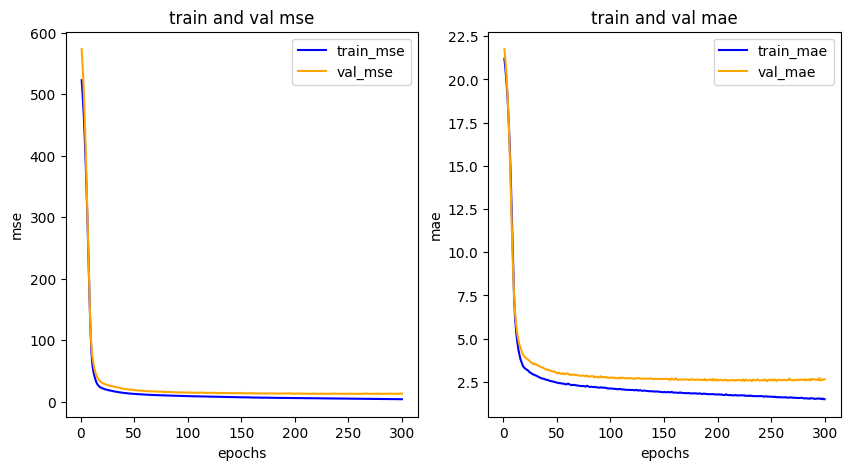

In [12]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

## 모델 평가하기

In [13]:
model.evaluate(X_test, y_test) # 2.2 -> 실제 집값과 2,200 달러 정도 차이로 집값 예측

4/4 [==============================] - 0s 4ms/step - loss: 9.8896 - mae: 2.2471 - mse: 9.8896


[9.889628410339355, 2.2470757961273193, 9.889628410339355]

## 모델 예측-> 차트 그리기

4/4 [==============================] - 0s 5ms/step


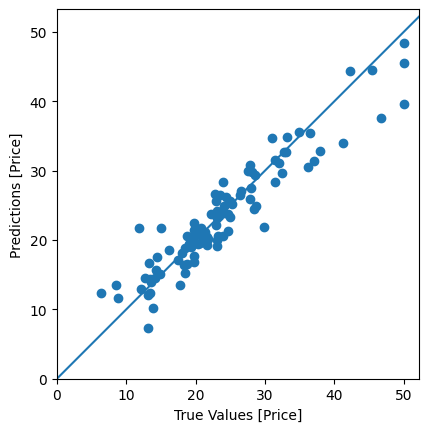

In [14]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## K- FOLD 사용하여 모델 학습하기

*   학습 데이터 부족으로 성능이 낮은 경우 적용 가능
*   검증 데이터셋을 k-fold를 사용하여 학습 데이터 확보

## k-fold를 위한 데이터 준비하기

In [15]:
from keras.datasets.boston_housing import load_data                           # no tensorflow

# 데이터를 다운받습니다.(훈련셋 80%, 테스트셋 20%)
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

In [16]:
import numpy as np

# 데이터 표준화
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### K-FOLD 를 사용한 모델 학습

In [18]:
from sklearn.model_selection import KFold
# 3-fold 로 나눠서 검증데이터셋 사용하여 학습
k =3

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model():
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1))   # activation = linear

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

# 각 모델의 평가 정보 담는 리스트 선언
mae_list = []

# k번 학습 및 평가
# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델을 불러옵니다.
    model = get_model()

    model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold))

    _, test_mae = model.evaluate(X_test, y_test)
    mae_list.append(test_mae)



Epoch 1/300
9/9 [==============================] - 1s 38ms/step - loss: 587.7433 - mae: 22.3121 - val_loss: 557.9016 - val_mae: 21.7265
Epoch 2/300
9/9 [==============================] - 0s 13ms/step - loss: 564.2549 - mae: 21.7908 - val_loss: 537.1339 - val_mae: 21.2388
Epoch 3/300
9/9 [==============================] - 0s 9ms/step - loss: 541.1297 - mae: 21.2677 - val_loss: 515.3892 - val_mae: 20.7141
Epoch 4/300
9/9 [==============================] - 0s 13ms/step - loss: 515.4985 - mae: 20.6714 - val_loss: 489.4986 - val_mae: 20.0729
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 484.0773 - mae: 19.9117 - val_loss: 455.9772 - val_mae: 19.2381
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 444.5518 - mae: 18.9433 - val_loss: 413.2702 - val_mae: 18.1621
Epoch 7/300
9/9 [==============================] - 0s 9ms/step - loss: 394.8471 - mae: 17.6959 - val_loss: 361.3117 - val_mae: 16.8052
Epoch 8/300
9/9 [==============================] - 0

In [20]:
mae_list

[2.06453537940979, 2.0441367626190186, 2.1604652404785156]

### k-fold 사용한 모델 성능평가

In [19]:
print(f'전체 결과: {mae_list}')
print(f'평균낸 결과를 최종 결과로 사용합니다: {np.mean(mae_list)}')

전체 결과: [2.06453537940979, 2.0441367626190186, 2.1604652404785156]
평균낸 결과를 최종 결과로 사용합니다: 2.089712460835775


In [21]:
np.mean(mae_list) #2.08 -> 실제 집값하고 2000달러 차이

2.089712460835775

## 검증 데이터셋 사용하지 않고 학습한 모델 성능 평가

In [22]:
from keras.datasets.boston_housing import load_data                           # no tensorflow

# 데이터를 다운받습니다.(훈련셋 80%, 테스트셋 20%)
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

In [23]:
import numpy as np

# 데이터 표준화
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [24]:
from sklearn.model_selection import KFold
# 3-fold 로 나눠서 검증데이터셋 사용하여 학습
k =3

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model():
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1))   # activation = linear

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

  model.fit(X_train,y_train,epochs=300)

  model.evaluate(X_test, y_test)

In [25]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 9.1705 - mae: 2.1605


[9.17051887512207, 2.1604652404785156]

## 교수님이 하라는거


In [34]:
from keras.datasets.boston_housing import load_data                           # no tensorflow

# 데이터를 다운받습니다.(훈련셋 80%, 테스트셋 20%)
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

In [35]:
import numpy as np

# 데이터 표준화
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [36]:
from sklearn.model_selection import KFold
# 3-fold 로 나눠서 검증데이터셋 사용하여 학습
k =4

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model():
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1))   # activation = linear

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

# 각 모델의 평가 정보 담는 리스트 선언
mae_list = []

# k번 학습 및 평가
# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]



Epoch 1/300
10/10 [==============================] - 2s 106ms/step - loss: 585.0000 - mae: 22.2740 - val_loss: 548.1459 - val_mae: 21.6711
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 559.1180 - mae: 21.7086 - val_loss: 526.9958 - val_mae: 21.1697
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 532.6047 - mae: 21.0961 - val_loss: 503.1765 - val_mae: 20.5854
Epoch 4/300
10/10 [==============================] - 0s 8ms/step - loss: 502.1030 - mae: 20.3722 - val_loss: 473.8099 - val_mae: 19.8523
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 464.8607 - mae: 19.4715 - val_loss: 436.6185 - val_mae: 18.9240
Epoch 6/300
10/10 [==============================] - 0s 10ms/step - loss: 417.8430 - mae: 18.2960 - val_loss: 390.8489 - val_mae: 17.7323
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 360.8412 - mae: 16.8446 - val_loss: 336.5778 - val_mae: 16.2184
Epoch 8/300
10/10 [===================

In [37]:
np.mean(mae_list)

2.0999101996421814

4fold 오차:2.09

In [39]:
from keras.datasets.boston_housing import load_data                           # no tensorflow

# 데이터를 다운받습니다.(훈련셋 80%, 테스트셋 20%)
(X_train, y_train), (X_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

In [40]:
import numpy as np

# 데이터 표준화
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [41]:
from sklearn.model_selection import KFold
# 3-fold 로 나눠서 검증데이터셋 사용하여 학습
k =5

kfold = KFold(n_splits=k)

# 재사용을 위해 모델 구성 및 설정 함수로 선언
def get_model():
  model = Sequential()

  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1))   # activation = linear

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

# 각 모델의 평가 정보 담는 리스트 선언
mae_list = []

# k번 학습 및 평가
# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델을 불러옵니다.
    model = get_model()

    model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold))

    _, test_mae = model.evaluate(X_test, y_test)
    mae_list.append(test_mae)

Epoch 1/300
11/11 [==============================] - 1s 20ms/step - loss: 586.8054 - mae: 22.2935 - val_loss: 529.1309 - val_mae: 21.3925
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 554.3134 - mae: 21.6075 - val_loss: 500.3708 - val_mae: 20.7387
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 520.0305 - mae: 20.8603 - val_loss: 466.7335 - val_mae: 19.9463
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 479.4054 - mae: 19.9381 - val_loss: 426.8930 - val_mae: 18.9499
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 430.6929 - mae: 18.7436 - val_loss: 377.3108 - val_mae: 17.6363
Epoch 6/300
11/11 [==============================] - 0s 8ms/step - loss: 371.7789 - mae: 17.2156 - val_loss: 319.7280 - val_mae: 15.9865
Epoch 7/300
11/11 [==============================] - 0s 7ms/step - loss: 304.7091 - mae: 15.3324 - val_loss: 257.5397 - val_mae: 13.9836
Epoch 8/300
11/11 [=====================

## 5fold 결과:

In [42]:
np.mean(mae_list)

2.072092294692993